In [1]:
import os
import tarfile
import urllib
# https://github.com/ageron/handson-ml2
import matplotlib.pyplot as plt

In [2]:
# DOWNLOAD_ROOT = "https://github.com/ageron/handson-ml2"
HOUSING_PATH = os.path.join("datasets","housing")
HOUSING_URL =  "C:/Users/Donald/Desktop/handson-ml2/datasets/housing/housing.tgz"

In [5]:
def fetch_housing_data(housing_url=HOUSING_URL,housing_path=HOUSING_PATH):
    os.makedirs(housing_path,exist_ok=True)
    tgz_path = os.path.join(housing_path,"housing.tgz")
    urllib.request.urlretrieve(housing_url,housing_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [6]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path,"housing.csv")
    return pd.read_csv("./housing.csv")

In [7]:
housing = load_housing_data()
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

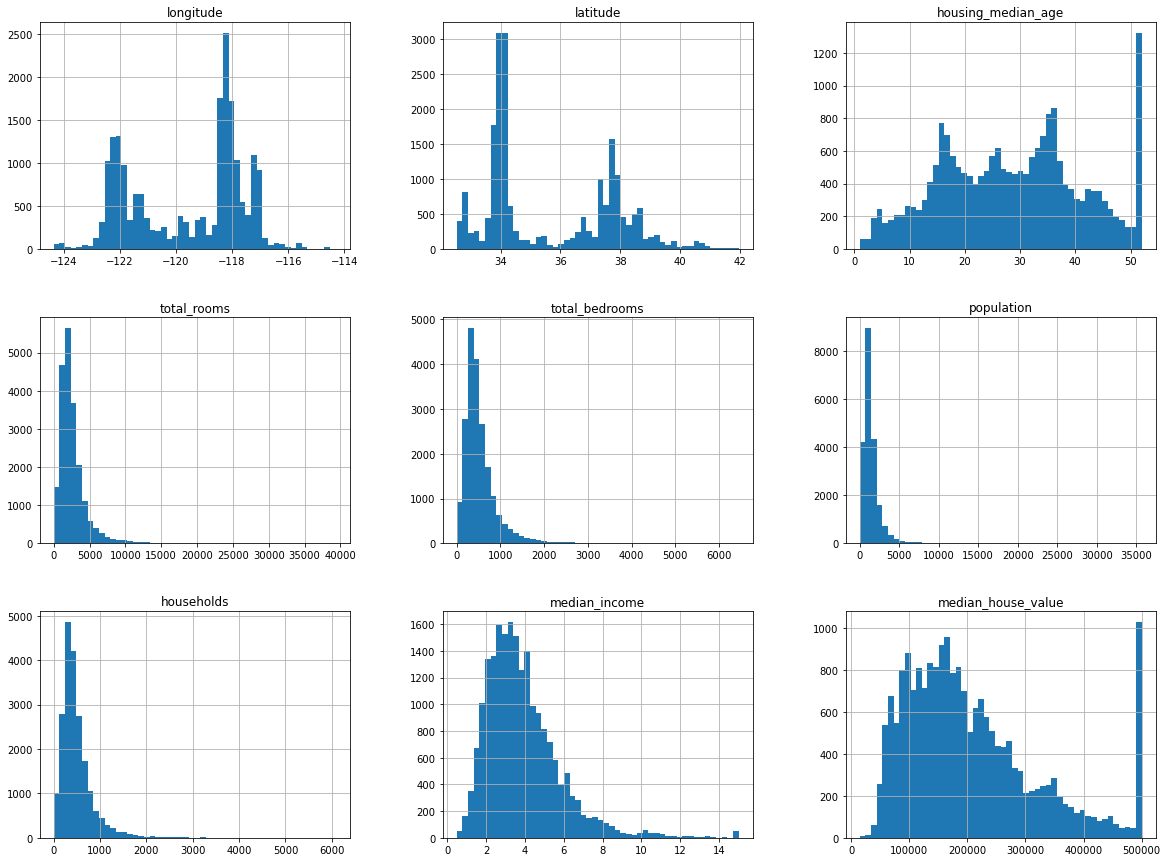

In [10]:
housing.hist(bins=50,figsize=(20,15))
plt.show()

In [11]:
housing.median()

C:\Users\Donald\AppData\Local\Temp/ipykernel_21952/2435994035.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  housing.median()


longitude               -118.4900
latitude                  34.2600
housing_median_age        29.0000
total_rooms             2127.0000
total_bedrooms           435.0000
population              1166.0000
households               409.0000
median_income              3.5348
median_house_value    179700.0000
dtype: float64

<AxesSubplot:>

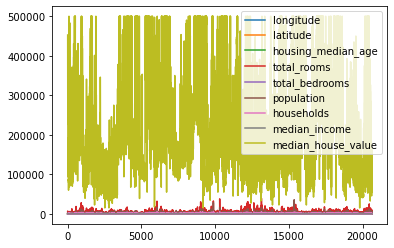

In [12]:
housing.plot()

In [13]:
#now the technical parts come in, to plot the instances into test and training sets
import numpy as np

def split_test_and_train(data,test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [14]:
a = split_test_and_train(housing,test_ratio=0.2)
print(a)

(       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
19788    -122.95     40.71                26.0       2231.0           421.0   
3930     -118.58     34.21                24.0       2642.0           696.0   
17198    -119.75     34.45                 6.0       2864.0             NaN   
4269     -118.31     34.10                33.0        766.0           347.0   
4195     -118.23     34.11                31.0       1021.0           191.0   
...          ...       ...                 ...          ...             ...   
11868    -121.09     40.30                15.0       1717.0           336.0   
4716     -118.38     34.06                28.0       2522.0           616.0   
2122     -119.71     36.74                18.0       8099.0          1670.0   
15482    -117.14     33.15                16.0       1129.0           198.0   
16615    -120.92     35.40                23.0       2059.0           354.0   

       population  households  median_income  medi

In [15]:
train_set,test_set = split_test_and_train(housing,0.2)
len(train_set)

16512

In [16]:
len(test_set)

4128

In [17]:
from zlib import crc32

def test_check_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xfffffffff < test_ratio * 2*32

In [18]:
def split_test_train_by_id(data,id_column,test_ratio):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_ : test_check_set(id_,test_ratio))
    return data.loc[~in_test_set],data.loc[in_test_set]

In [19]:
housing_with_id = housing.reset_index()
train_set,test_set = split_test_train_by_id(housing_with_id,"index",0.2)

In [20]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set,test_set = split_test_train_by_id(housing_with_id,"id",0.2)

In [21]:
from sklearn.model_selection import train_test_split

train_set,test_set = train_test_split(housing,test_size=0.2,random_state=42)

<AxesSubplot:>

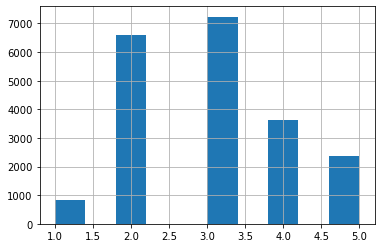

In [22]:
housing["income_category"] = pd.cut(housing["median_income"],bins=[0.,1.5,3.0,4.5,6.0,np.inf],labels=[1,2,3,4,5])
housing["income_category"].hist()

In [23]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index, test_index  in split.split(housing,housing["income_category"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]


In [24]:
strat_test_set["income_category"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_category, dtype: float64

In [25]:
for set_ in (strat_train_set,strat_test_set):
    set_.drop("income_category", axis=1, inplace=True)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

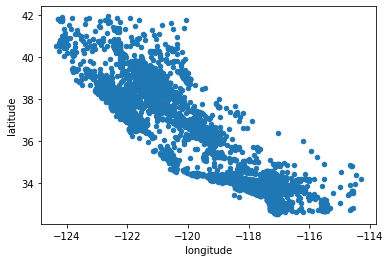

In [26]:
housingCopy = strat_train_set.copy()
housingCopy.plot(kind="scatter",x="longitude",y="latitude")

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

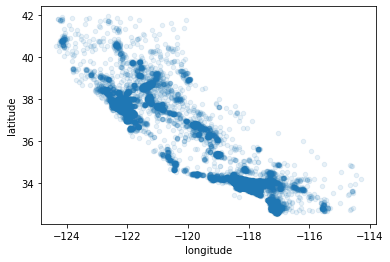

In [27]:
housingCopy.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1)

<AxesSubplot:>

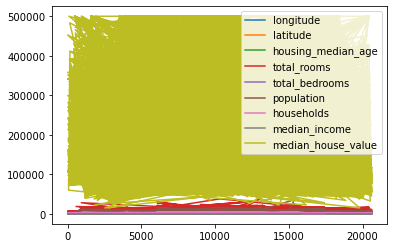

In [28]:
housingCopy.plot()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

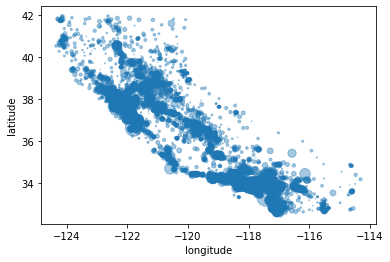

In [29]:
housing.plot(kind = "scatter",x = "longitude",y = "latitude", alpha = 0.4, s=housing["population"]/100)

In [30]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [31]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_income', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='housing_median_age'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot

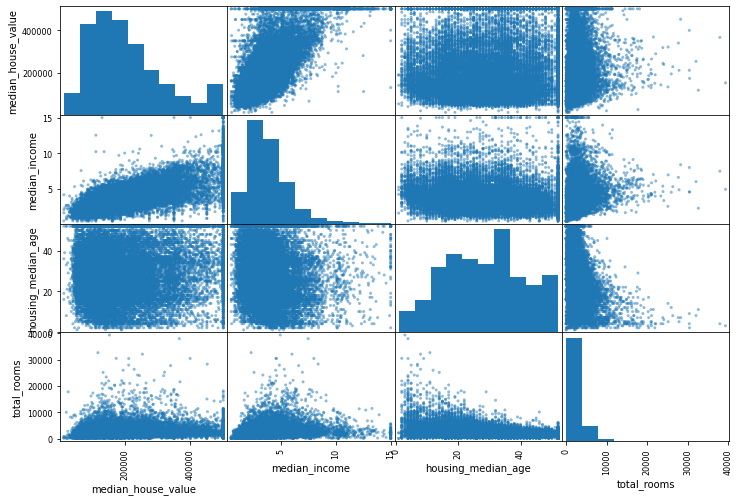

In [32]:
attributes = ["median_house_value","median_income","housing_median_age","total_rooms"]
scatter_matrix(housing[attributes], figsize=(12,8))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

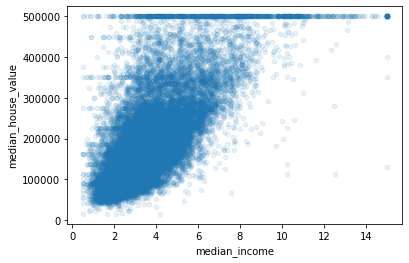

In [33]:
housing.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.1)

 ## Experimenting With Attribute Combinations:
     Before preparing the machine learning algorithm you must try the ATTRIBUTES COMBINATIONS For example total numbers of rooms is not really useful if you don't know how many households are there.

In [32]:
#creating new attributes

housing["rooms_per_household"]=housing["total_rooms"]/housing["households"]
housing["bedrooms_per_rooms"]=housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_rooms         -0.255880
Name: median_house_value, dtype: float64

# Prepare the data for ML algo
### writing the functions is ought to be more efficient.

In [33]:
housing = strat_train_set.drop("median_house_value", axis = 1)
housing_labels = strat_train_set["median_house_value"].copy() 

# Data Cleaning
    Gonna use DataFrame's 
        dropna(),drop(),and fillna()

In [34]:
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True)

# SimpleImputer
    sklearn's fuction which takes care of missing values
    

In [35]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = "median")
housing_num = housing.drop("ocean_proximity",axis=1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [36]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [37]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [38]:
x = imputer.transform(housing_num)

In [39]:
housing_tr = pd.DataFrame(x,columns=housing_num.columns,index=housing_num.index)

# Scikit-learn's Design is crazy
    estimators, transformers, Predicors, inspection
## Handling text and categorical Attributes
    so far we have dealt with numerical attributes, but now let's look at text attributes

In [40]:
housing_category = housing[["ocean_proximity"]]
housing_category.head(10)

ocean_proximity
17606       <1H OCEAN
18632       <1H OCEAN
14650      NEAR OCEAN
3230           INLAND
3555        <1H OCEAN
19480          INLAND
8879        <1H OCEAN
13685          INLAND
4937        <1H OCEAN
4861        <1H OCEAN

In [41]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder=OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_category)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [42]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [43]:
from sklearn.preprocessing import OneHotEncoder 
cat_encoder=OneHotEncoder()

housing_cat_1hot=cat_encoder.fit_transform(housing_category)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [44]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [45]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

# Custom Transformers
    

In [46]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3,4,5,6

In [47]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self,add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

# Feature Scaling
## Transformation Pipelines


In [48]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder',CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [49]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num",num_pipeline,num_attribs),
    ("cat",OneHotEncoder(),cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)

# Select and Train a Model
## Training and Evaluating on the Training_Set

In [50]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)


LinearRegression()

In [51]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

In [52]:
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


In [53]:
print("Labels:", list(some_labels))

Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [54]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848922

# Ways to fix underfitting :
    1>reduce the constraints
    2>Use more powerfull model to feed the Training algo.
    
## using decision tree

In [55]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [56]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse


0.0

# better evaluation via Cross-Validation
    using train_test_split() function to split the training set into smaller training and validation set
    
## Alternative :
    We ca  use scikit-learn's **K-fold** cross validation feature which divides into 10 distinct sub-sets

In [57]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring = 'neg_mean_squared_error',cv = 10)

tree_rmse_scores = np.sqrt(-scores)

In [58]:
def display_scores(scores):
    print("scores",scores)
    print("mean",scores.mean())
    print("standard deviation",scores.std())

In [59]:
display_scores(tree_rmse_scores)

scores [69639.46649437 66798.66136454 71532.54392918 68865.44093533
 70468.10822526 75305.71287547 69855.05307515 70795.10139998
 77170.40873715 69835.70238497]
mean 71026.61994213963
standard deviation 2897.234008783617


# We will now try The RandomForest regressor

In [60]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [61]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse =mean_squared_error(housing_labels, housing_predictions)
forest_rmse =np.sqrt(forest_mse)
forest_rmse

18628.087541742934

In [62]:
forest_scores =cross_val_score(lin_reg,housing_prepared, housing_labels, scoring = "neg_mean_squared_error",cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

scores [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
mean 69052.46136345083
standard deviation 2731.6740017983443


# Time to Fine_Tune my Model

## fine-tuning can be done in two ways :
    grid_search / randomized_search
    for small hyperparameter space / for large hyperparameter spacefor 

In [63]:
## grid search first
### Here bootstrap is set to False as now it will consider combination's sum instead .
#### like 12+6 = 18
from sklearn.model_selection import GridSearchCV

param_grid = [
    {"n_estimators":[3,30,300],"max_features":[2,4,6,10]},
    {'bootstrap':[False],'n_estimators':[3,20],'max_features':[2,3,6]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg,param_grid,cv=5,
                      scoring='neg_mean_squared_error',
                      return_train_score = True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 10],
                          'n_estimators': [3, 30, 300]},
                         {'bootstrap': [False], 'max_features': [2, 3, 6],
                          'n_estimators': [3, 20]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_params_

In [71]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=300)

In [72]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"],cvres["params"]):
    print(np.sqrt(-mean_score),params)

64528.101462578576 {'max_features': 2, 'n_estimators': 3}
53066.173044901836 {'max_features': 2, 'n_estimators': 30}
51444.649631798675 {'max_features': 2, 'n_estimators': 300}
60774.43421198709 {'max_features': 4, 'n_estimators': 3}
50499.15010580157 {'max_features': 4, 'n_estimators': 30}
49346.773508770195 {'max_features': 4, 'n_estimators': 300}
59383.48417857022 {'max_features': 6, 'n_estimators': 3}
50399.49357165869 {'max_features': 6, 'n_estimators': 30}
48977.13017726459 {'max_features': 6, 'n_estimators': 300}
57994.06777830718 {'max_features': 10, 'n_estimators': 3}
50367.86254763325 {'max_features': 10, 'n_estimators': 30}
49408.647153509984 {'max_features': 10, 'n_estimators': 300}
62268.40386953804 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
52262.805863630296 {'bootstrap': False, 'max_features': 2, 'n_estimators': 20}
58950.1235660838 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
50605.450723280606 {'bootstrap': False, 'max_features': 3, 'n_es